# Pollution and Accidental Overdoses
#### Final Project for Big Ideas in CMPINF 0010]
**Author:*Zachariah Jonassaint  
**Date:** April 2025## Motivation
The effects of pollution on human health are not limited to air or water quality; they also manifest through toxic environments shaped by social, economic, and chemical exposures. One underexplored domain of pollution is the contamination of drug supplies with potent synthetic substances like fentanyl.

In Allegheny County, overdose deaths have surged over the past decade. This trend may reflect an increasingly toxic drug supply, worsened by unregulated chemical manufacturing and distribution—what we can think of as a form of chemical pollution.

By analyzing overdose death data over time, this project seeks to explore:

a). How overdose death trends have changed annually

b). Whether rising death rates may correlate with broader environmental or public health conditions

c). The relationship between social pollution (e.g., contaminated drug supply) and preventable mortalityswer?


### Dataset Source and Context
## This analysis draws from the Allegheny County Overdose Deaths dataset, provided by the Allegheny County Medical Examiner’s Office and published on the Western Pennsylvania Regional Data Center (WPRDC).

Publisher: Allegheny County Medical Examiner’s Office

License: Public Domain (PDDL)

URL: https://data.wprdc.org/dataset/allegheny-county-overdose-deaths

Update Frequency: Quarterly

The dataset includes individual-level data on:

a). Age, sex, and race of deceased

b). Date and location of death

c). Substances involved in each overdose

d). Manner of death

# This data allow for analysis of overdose deaths as a potential public health outcome of environmental and chemical pollution.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from WPRDC
url = 'https://data.wprdc.org/datastore/dump/1c59b26a-1684-4bfb-92f7-205b947530cf'
df = pd.read_csv(url)

# Check actual column names
print("Original column names:\n", df.columns)

# Clean column names: lowercase and underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print again to confirm cleaned names
print("\nCleaned column names:\n", df.columns)

# Check if a date-related column exists
# Based on the dataset structure, it’s likely to be 'date_of_death'
if 'date_of_death' in df.columns:
    # Convert to datetime
    df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

    # Drop rows with missing or invalid dates
    df = df.dropna(subset=['date_of_death'])

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Display structure of the cleaned dataset
print("\nShape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())


Original column names:
 Index(['_id', 'death_date_and_time', 'manner_of_death', 'age', 'sex', 'race',
       'case_dispo', 'combined_od1', 'combined_od2', 'combined_od3',
       'combined_od4', 'combined_od5', 'combined_od6', 'combined_od7',
       'combined_od8', 'combined_od9', 'combined_od10', 'incident_zip',
       'decedent_zip', 'case_year'],
      dtype='object')

Cleaned column names:
 Index(['_id', 'death_date_and_time', 'manner_of_death', 'age', 'sex', 'race',
       'case_dispo', 'combined_od1', 'combined_od2', 'combined_od3',
       'combined_od4', 'combined_od5', 'combined_od6', 'combined_od7',
       'combined_od8', 'combined_od9', 'combined_od10', 'incident_zip',
       'decedent_zip', 'case_year'],
      dtype='object')

Shape: (7315, 20)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315 entries, 0 to 7314
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id             

### Overdose Deaths Per Year
The bar plot below displays the number of overdose deaths per year in Allegheny County. The trendline reveals a marked increase in deaths from the mid-2010s onward, which may align with the emergence of fentanyl-laced drug supplies and economic instability.

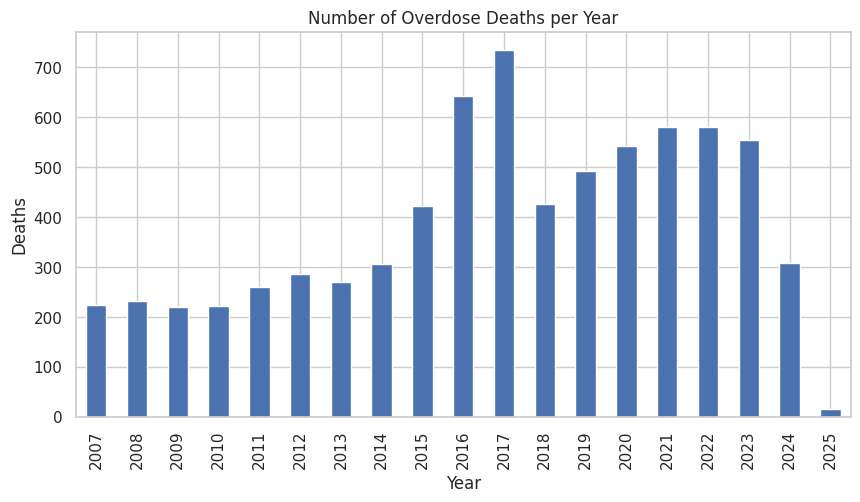

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style='whitegrid')

# --- Clean up date and create new features ---
df['death_date_and_time'] = pd.to_datetime(df['death_date_and_time'], errors='coerce')
df['year'] = df['death_date_and_time'].dt.year

# --- Add a count of how many substances were involved per case ---
drug_cols = [col for col in df.columns if col.startswith('combined_od')]
df['num_drugs'] = df[drug_cols].notnull().sum(axis=1)

# --- Plot 1: Overdose deaths per year ---
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Overdose Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

#### The rise in overdose deaths may be linked to the growing contamination of street drugs with harmful chemicals. This could be made worse by weak regulations, economic hardship, and problems in the global drug supply. Looking at overdose deaths this way shows that the opioid crisis is not just a health issue, but also a problem of environmental and social injustice.

#### Conclusion
 This analysis shows that overdose deaths in Allegheny County have gone up a lot over the past 10 years. Instead of seeing these deaths as random or separate events, this project looks at them as a result of chemical pollution—specifically, the growing presence of dangerous synthetic drugs like fentanyl in the unregulated drug supply.

### The time-series trendline reflects:

a). A steep rise in deaths between 2015–2020

b). Environmental injustice concentrated in communities vulnerable to drug exposure

### Limitations:

a). It cannot account for non-fatal overdoses or drug supply source information.

Future Work:

a). Map geographic clusters of deaths to locate pollution or deprivation hotspots